In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df=pd.read_csv('treadmil-users.csv')

In [5]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [8]:
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

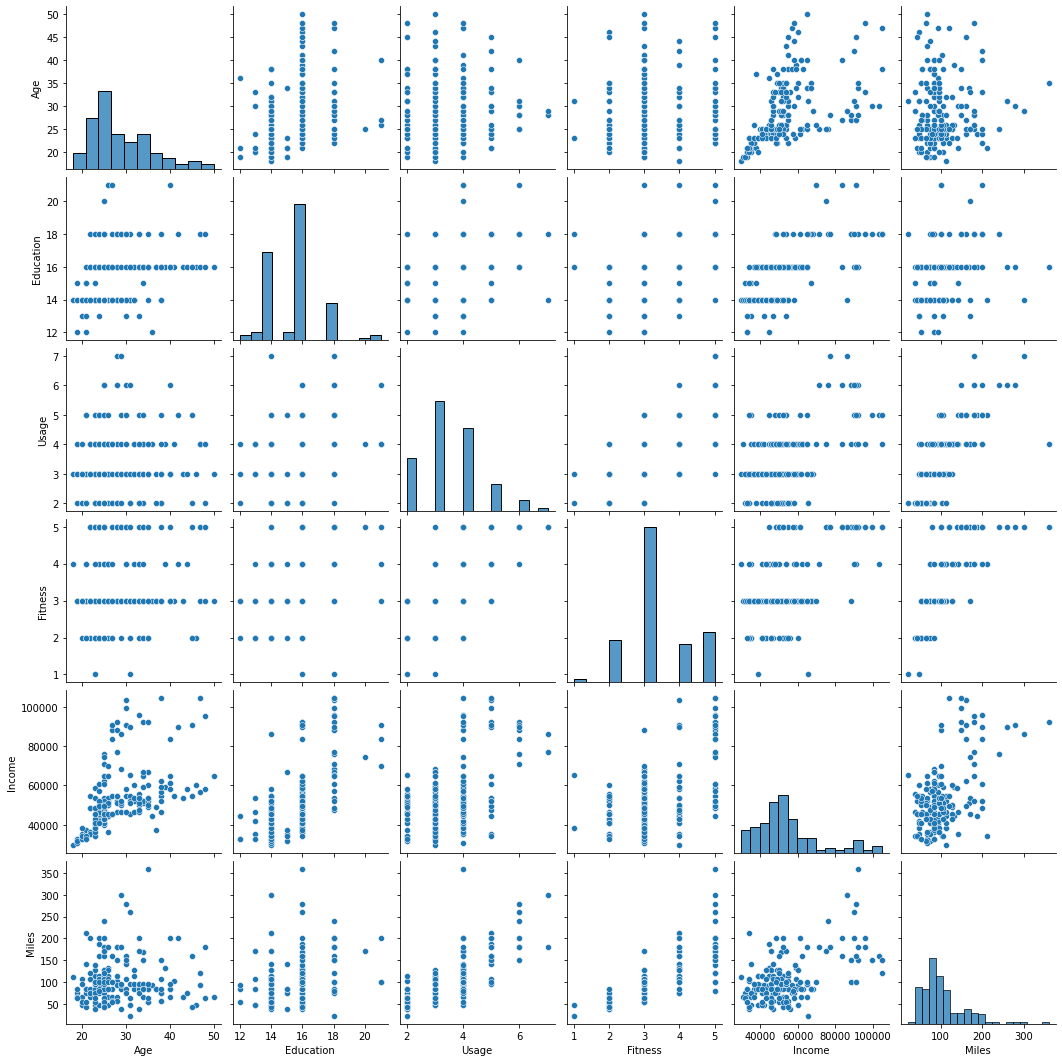

In [9]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='Product', ylabel='Income'>

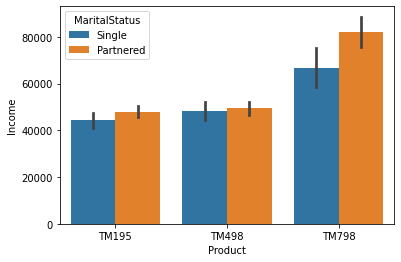

In [10]:
sns.barplot(x='Product',y='Income',data=df,hue='MaritalStatus')

<AxesSubplot:xlabel='Product', ylabel='Education'>

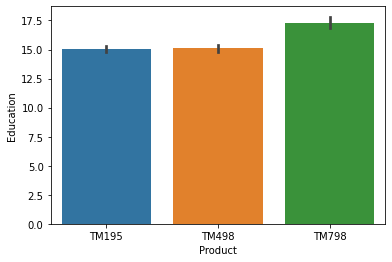

In [11]:
sns.barplot(x='Product',y='Education',data=df)

<AxesSubplot:xlabel='Product', ylabel='Miles'>

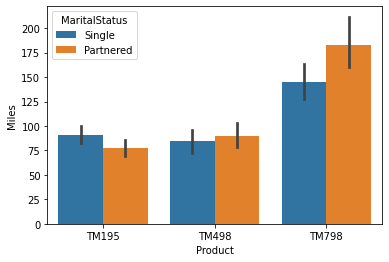

In [12]:
sns.barplot(x='Product',y='Miles',data=df,hue='MaritalStatus')

<AxesSubplot:xlabel='Product', ylabel='Miles'>

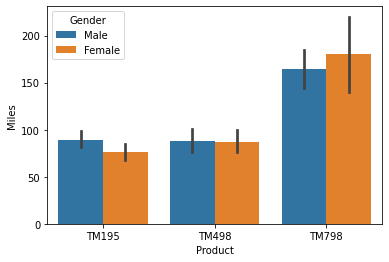

In [13]:
sns.barplot(x='Product',y='Miles',data=df,hue='Gender')

<AxesSubplot:xlabel='Product', ylabel='Fitness'>

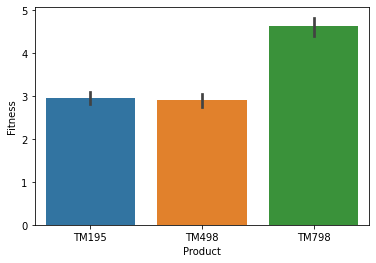

In [14]:
sns.barplot(x='Product',y='Fitness',data=df)

<AxesSubplot:xlabel='Product', ylabel='Age'>

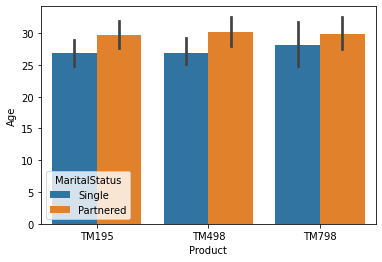

In [15]:
sns.barplot(x='Product',y='Age',data=df,hue='MaritalStatus')

<AxesSubplot:xlabel='Product', ylabel='Usage'>

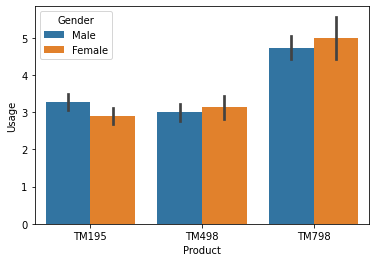

In [16]:
sns.barplot(x='Product',y='Usage',data=df,hue='Gender')

In [17]:
gen = pd.DataFrame(pd.get_dummies(df['Gender']).values,columns = ['gen_1','gen_2'],index=df.index)

In [18]:
pat =  pd.DataFrame(pd.get_dummies(df['MaritalStatus']).values,columns = ['pat_1','pat_2'],index=df.index)

In [19]:
df3=pd.concat([df,gen,pat],axis=1)
del df3['Gender']
del df3['MaritalStatus']
df3.head()

,Product,Age,Education,Usage,Fitness,Income,Miles,gen_1,gen_2,pat_1,pat_2
0,TM195,18,14,3,4,29562,112,0,1,0,1
1,TM195,19,15,2,3,31836,75,0,1,0,1
2,TM195,19,14,4,3,30699,66,1,0,1,0
3,TM195,19,12,3,3,32973,85,0,1,0,1
4,TM195,20,13,4,2,35247,47,0,1,1,0


In [20]:
x=df3.drop('Product',axis=1)
y=df3['Product']

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=100)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_logi = LogisticRegression(solver='newton-cg').fit(df3.drop('Product',axis=1),df3['Product'])

In [ ]:
model_logi.score(xtest,ytest)*100

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(df3['Product'], model_logi.predict(df3.drop('Product',axis=1))))

In [ ]:
print(confusion_matrix(df3['Product'], model_logi.predict(df3.drop('Product',axis=1))))